# **2nd DNN**

**2nd network DNN Thinking about**

1. 3x3 Convolutions,
2. Receptive Field,
3. MaxPooling,
4. 1x1 Convolutions,
5. Concept of Transition Layers,
6. Position of Transition Layer,
7. SoftMax,
8. How many layers,
9. Kernels and how do we decide the number of kernels?
10. Position of MaxPooling,

Purpose to get the No of total Parameters to less then 15K

**This is version 1  **

  8 – 3X3, 8 Convolutions; 1 - 1X1 Convolution; 
 
 Similar case of over fitting with lower no of params



installing and Importing Keras for current solution

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Importing Numpy and Keras modules as well as mnist data set.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Loading mnist data set in train and test variables.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Ploting sample from train data set.

(60000, 28, 28)


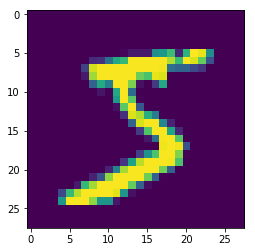

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshaping all train and test data to a uniform size.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Regularizing train and test data for float data type and division wiht 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Visualizing train out put

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Viewing tranformed train out put matrix

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

2nd network DNN
Thinking about 
1.1. 3x3 Convolutions,
2. Receptive Field,
3. MaxPooling,
4. 1x1 Convolutions,
5. Concept of Transition Layers,
6. Position of Transition Layer,
7. SoftMax,
8. How many layers,
9. Kernels and how do we decide the number of kernels?
10. Position of MaxPooling,

Purpose to get the No of total Parameters to less then 15K

In [21]:
from keras.layers import Activation
model = Sequential()

#Vanilla
''' 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
'''

#1st version 
''''''
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 22,22 #RF 9X9
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 20,20 #RF 11X11
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 18,18 #RF 13X13
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 16,16 #RF 15X15
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 14,14 #RF 17X17
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 12,12 #RF 19X19
model.add(Convolution2D(10, 1)) #input 10,10 , activation='relu'
model.add(Convolution2D(10, 10)) #input 10,10


#2nd version 
'''
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(MaxPooling2D(pool_size=(2, 2))) #input 22,22 #RF 14X14
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 11,11 #RF 16X16
model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 9)) #input 9X9
'''

#3rd version 
'''
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(MaxPooling2D(pool_size=(2, 2))) #input 24,24 #RF 6X6
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 12,12 #RF 8X8
model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 10)) #input 9X9
'''

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: Use

Printing model summary to understand current paramaters for the model. 

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 8)         584       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 8)         584       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 20, 20, 8)         584       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 18, 18, 8)         584       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 8)         584       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 8)         584       
__________

Setting model's compile environment with loss function, optimizer and matrics.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Training model for 20 epoch for 32 batch size

In [25]:
history = model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.2768 - acc: 0.9131 - val_loss: 0.1045 - val_acc: 0.9672
Epoch 2/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.1000 - acc: 0.9684 - val_loss: 0.0781 - val_acc: 0.9748
Epoch 3/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0795 - acc: 0.9753 - val_loss: 0.0588 - val_acc: 0.9828
Epoch 4/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0671 - acc: 0.9794 - val_loss: 0.0672 - val_acc: 0.9792
Epoch 5/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0600 - acc: 0.9818 - val_loss: 0.0509 - val_acc: 0.9830
Epoch 6/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.0530 - acc: 0.9838 - val_loss: 0.0610 - val_acc: 0.9817
Epoch 7/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0502 - acc: 0.9839 - val_loss: 0.

Plotting training and validation accuracty as well as loss for every epoch

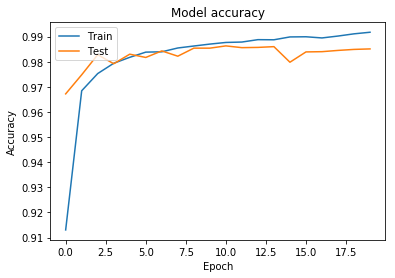

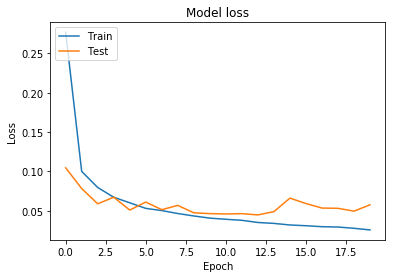

In [26]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Evaluating model and storing score in a variable.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Printing loss and accuracy of model test done in last step

In [28]:
print(score)

[0.05750734096859669, 0.9851]


Predicting out put for test inputs

In [0]:
y_pred = model.predict(X_test)

Printing prediction and test out puts 

In [30]:
print(y_pred[:9])
print(y_test[:9])

[[1.4093718e-11 8.0250792e-11 5.1526729e-07 8.4975218e-06 4.8293120e-18
  6.3921500e-11 6.8935487e-23 9.9999094e-01 1.1374089e-14 1.4621498e-08]
 [7.6030995e-09 3.3127538e-09 1.0000000e+00 3.8395023e-11 2.5567576e-11
  3.7329818e-15 6.9047670e-09 1.0750392e-15 6.0379889e-11 6.4003956e-18]
 [2.5028350e-12 9.9999928e-01 1.6656101e-07 1.2420142e-07 2.2560915e-08
  1.8613191e-08 3.6836831e-10 4.0555560e-07 4.8390927e-09 1.2645555e-09]
 [9.9999511e-01 2.4238525e-14 2.3221148e-08 1.3805357e-09 6.1737664e-12
  5.8497559e-08 4.3704940e-06 1.5159719e-07 3.4799183e-10 3.0854477e-07]
 [2.2174249e-11 3.1577632e-15 7.4005749e-12 3.9188524e-11 9.9999976e-01
  1.0627690e-09 1.0763841e-09 4.8686185e-13 7.8486103e-08 1.7485908e-07]
 [2.9132224e-11 9.9999821e-01 4.5417815e-07 8.2082721e-08 3.5250789e-08
  1.3066129e-09 4.9254911e-10 1.2433514e-06 9.3243839e-09 3.1757310e-09]
 [2.0023819e-15 3.8995537e-08 1.2271919e-06 8.2728668e-08 9.9991763e-01
  1.1114557e-11 6.3868854e-13 6.1495351e-09 2.0433625e-05 

In [31]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_3': <keras.layers.core.Activation at 0x7f85a065f940>,
 'conv2d_13': <keras.layers.convolutional.Conv2D at 0x7f85b2940dd8>,
 'conv2d_14': <keras.layers.convolutional.Conv2D at 0x7f85b2940208>,
 'conv2d_15': <keras.layers.convolutional.Conv2D at 0x7f85a604db00>,
 'conv2d_16': <keras.layers.convolutional.Conv2D at 0x7f85a0748358>,
 'conv2d_17': <keras.layers.convolutional.Conv2D at 0x7f85a604db70>,
 'conv2d_18': <keras.layers.convolutional.Conv2D at 0x7f85a0768e48>,
 'conv2d_19': <keras.layers.convolutional.Conv2D at 0x7f85a0710128>,
 'conv2d_20': <keras.layers.convolutional.Conv2D at 0x7f85a0728e48>,
 'conv2d_21': <keras.layers.convolutional.Conv2D at 0x7f85a06d3128>,
 'conv2d_22': <keras.layers.convolutional.Conv2D at 0x7f85a06eee48>,
 'conv2d_23': <keras.layers.convolutional.Conv2D at 0x7f85a06b3748>,
 'flatten_3': <keras.layers.core.Flatten at 0x7f85a065f8d0>}

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()